In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../data_modules')
import spikeoutputs as so
import spikeplots as sp
import meaqc

Here I am loading a dataset from my SSD. Feel free to load this same one from the NAS array or any different one.

In [2]:
str_experiment = '20240326C'
d_meta = {'str_experiment': str_experiment,
          'str_protocol': 'SpatialNoise',
          'str_algo': 'kilosort4',
          'paramsfile': '/Volumes/data/analysis/20240326C/chunk1/kilosort4/kilosort4.params',
          'dataset_name': 'kilosort4',
          'str_classification': '/Volumes/data/analysis/20240326C/chunk1/kilosort4/kilosort4.classification.txt',
          'ls_RGC_labels': ['OffP', 'OffM', 'OnP', 'OnM', 'SBC'],
          'str_chunk': 'chunk1',
          'ls_filenames': ['data001', 'data002'],
          'ls_noise_filenames': ['data001', 'data002'],
          'paramsmatfile':'/Volumes/data/analysis/20240326C/chunk1/kilosort4/kilosort4_params.mat'}
data = so.SpikeOutputs(**d_meta)
data.load_sta_from_params(load_ei=True, load_neurons=True, isi_bin_edges=np.linspace(0,300,601))

Loading STA from /Volumes/data/analysis/20240326C/chunk1/kilosort4/kilosort4.params...
Loaded STA for 1162 cells.
Loading STA params from /Volumes/data/analysis/20240326C/chunk1/kilosort4/kilosort4_params.mat...
Loaded STA params for 1162 cells.
Loading STA ISI...
Loading ISI for manookinlab.protocols.SpatialNoise ['data001', 'data002']...
Processing group 1 of 1 and block 1 of 2
Processing group 1 of 1 and block 2 of 2
Loaded ISI for 1162 cells.


RACHEL: I don't think RGC labels should be hardcoded, in the case that type naming conventions weren't followed, or people want to look beyond these cell types. I tried to look at a dataset from late 2023 and typing was done in a different way, and changing the ls_RGC_labels parameter here did not help - I looked at the other files but I couldn't quite figure out how to alter those parameters. I ended up editing the classification file itself. I think in an ideal world, we feed in those labels here when creating the SO object. 

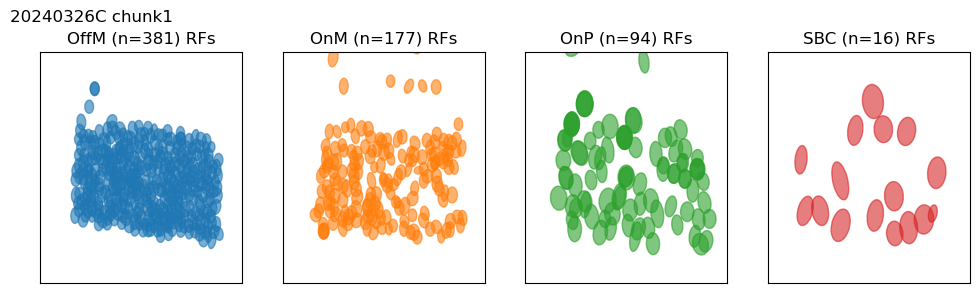

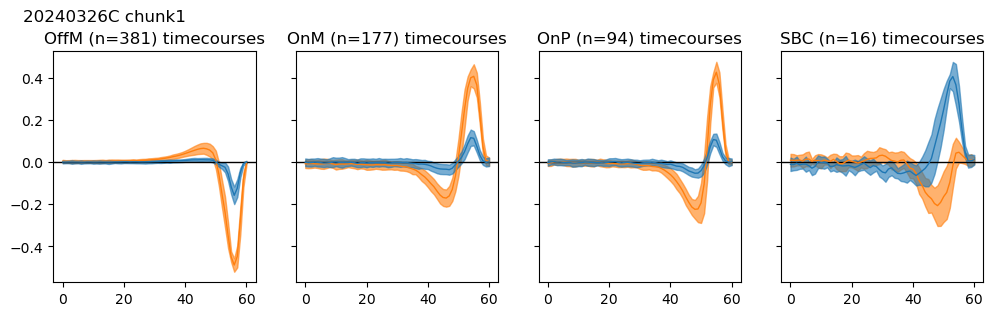

In [3]:
sp.plot_type_rfs(data, sd_mult=0.8, b_zoom=True);
sp.plot_type_tcs(data);

In [20]:

x = np.array([])
for i in data.vcd.main_datatable.keys():
    try:
        print(data.vcd.main_datatable[i]['SpikeTimes'][:10])
    except KeyError:
        x = np.append(x, i)

print(data.vcd.main_datatable[1]['SpikeTimes'][:10])

[ 918206  918545 1548066 1555834 1574694 1580286 1596442 1616099 1623140
 1637280]
[ 977508  984748 1007187 1017312 1019222 1054704 1061658 1064437 1080395
 1080798]
[ 956902  981858 1065138 1114789 1123922 1143815 1203950 1218082 1257599
 1430579]
[1208210 1222443 1537731 1539643 1541908 1544310 1546787 1556387 1558354
 1562206]
[573159 573595 574064 574571 575060 575683 576371 577317 578007 578758]
[ 919156 1008286 1105393 1105699 1174972 1277086 1277522 1302863 1539007
 1541578]
[ 965001 1177111 1553947 1562706 1564707 1565626 1568883 1573388 1582879
 1588116]
[ 6856  7825 16154 20469 20653 20788 35637 35734 40914 52644]
[1178163 1544416 1575678 1575893 1576062 1622250 1624128 1705777 1749660
 1779821]
[ 45140  80231 111248 123603 145731 164748 186376 211346 236603 278283]
[1537695 1557478 1605337 1801714 1822517 1866644 1897967 1982185 2084238
 2152572]
[1569123 1570835 1579235 1580865 1590726 1601418 1646030 1669859 1681302
 1692974]
[1592835 1677780 1802806 1942279 2130826 213720

In [28]:
print(data.vcd.main_datatable.keys())


dict_keys([1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 45, 48, 52, 53, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 71, 76, 77, 78, 79, 80, 81, 82, 84, 85, 88, 89, 90, 91, 92, 93, 94, 98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 119, 121, 122, 123, 124, 126, 127, 128, 131, 132, 133, 135, 137, 138, 139, 140, 142, 143, 144, 145, 146, 148, 150, 151, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 165, 167, 168, 169, 170, 172, 173, 175, 176, 177, 178, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 224, 225, 226, 227, 228, 229, 231, 232, 233, 235, 236, 238, 239, 240, 243, 245, 246, 247, 248, 249, 251, 252, 254, 255, 257, 260, 261, 262, 263, 265, 266, 268, 270, 271, 274, 276, 277, 278, 280, 281, 282, 283, 284, 285, 286, 28

## QC object demo
Here I use the QC class from meaqc.py for filtering cells based on #sps and ISI violations.

In [36]:
import importlib
importlib.reload(meaqc)
qc = meaqc.QC(data, b_noise_only=True)

Using first 3 bins for refractory period calculation.
isi_bin_edges: [[0.  0.5]
 [0.5 1. ]
 [1.  1.5]]


This threw a key error for me with one dataset I tried - for 'SpikeTimes'. It seems that some cell ids in the vcd.main_datable do not have a 'SpikeTimes' key for whatever reason. I added a try/except at line 207 of meaqc.py to catch any KeyErrors and that seemed to work for now.

Initializing the QC object will populate a `df_qc` table with properties of interest for each cell. 

Also currently, the initialization has hardcoded 1.5ms as the refractory period, based on which it sums the ISI for the 3 printed bins for calculating % refractory spikepairs.

In [37]:
qc.df_qc.head()

,cell_type,noise_spikes,noise_isi_violations,crf_f1,ei_corr
cell_id,,,,,
1.0,All/amacrine/nc15/,6421,0.078431,NaN,NaN
2.0,All/nc18/,43108,0.048417,NaN,NaN
3.0,OffM,19657,0.008394,NaN,NaN
4.0,OffM,16665,0.0,NaN,NaN
5.0,All/nc12/,9945,0.0,NaN,NaN


crf_f1 and ei_corr are not populated by default currently.

We can look at the distributions of noise_spikes and noise_isi_violations.

(0.0, 0.1)

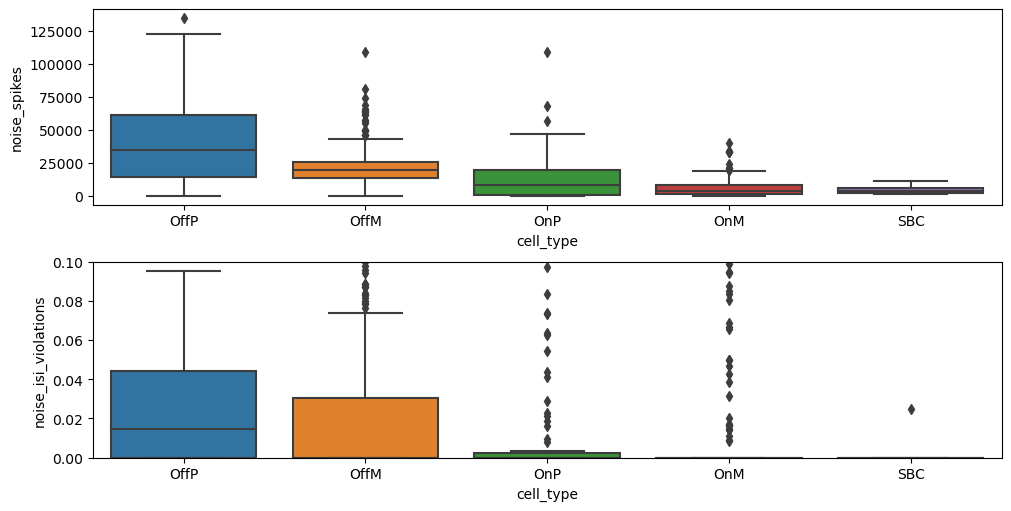

In [38]:
ls_params = ['noise_spikes', 'noise_isi_violations']
f, axs = plt.subplots(2, figsize=(10,5), constrained_layout=True) #RACHEL: added constrained_layout=True to avoid overlap of subplots
axs = axs.flatten()
for i, param in enumerate(ls_params):
    ax = axs[i]
    ax = qc.plot_dist_by_type(param, ax=ax)
axs[1].set_ylim(0,0.1)

RACHEL: I think this way of displaying the QC metrics is totally fine. I'd probably go for a violin plot over a box and whisker plot because I think it shows the distributions better, but this gets the point across well. Adding constrained_layout=True just helps everything be easier to read.

The QC object has a dictionary for storing sets of thresholds and their consequences. By default, it is initialized with one set labeled 'set1'.

`qc.d_thresh['set1']` itself will be a dictionary containing user-set threshold values and a `df_keep` dataframe that will be populated with 0s and 1s based on thresholds.

In [39]:
qc.d_thresh.keys()

dict_keys(['set1'])

In [40]:
qc.d_thresh['set1']['df_keep'].head()

,cell_type,noise_spikes,noise_isi_violations,crf_f1,ei_corr
cell_id,,,,,
1.0,All/amacrine/nc15/,NaN,NaN,NaN,NaN
2.0,All/nc18/,NaN,NaN,NaN,NaN
3.0,OffM,NaN,NaN,NaN,NaN
4.0,OffM,NaN,NaN,NaN,NaN
5.0,All/nc12/,NaN,NaN,NaN,NaN


RACHEL: I'm not totally clear on what the 'df_keep' DF is and how it differs from the other keys for set1.

## Threshold Method 1
The QC object has 2 methods for setting thresholds: 
- `set_abs_thresh`: for a specified parameter in `df_qc`, split cells based on the input `n_thresh` value. If `b_keep_below` is true than cells below the value are kept, otherwise cells above the value are kept.

In [41]:
# Keep only cells that have less than 0.01% noise ISI violations
qc.set_abs_thresh('set1', 'noise_isi_violations', 0.01, b_keep_below=True)

Now `d_thresh` will have a dictionary for that parameter with the thresholds used and summary consequences for each cell type.

In [42]:
qc.d_thresh['set1']['noise_isi_violations']

{'n_thresh': 0.01,
 'b_keep_below': True,
 'b_by_type': False,
 'n_cells': 723,
 'n_OffP': 45,
 'pct_OffP': 0.4838709677419355,
 'n_OffM': 225,
 'pct_OffM': 0.5905511811023622,
 'n_OnP': 73,
 'pct_OnP': 0.776595744680851,
 'n_OnM': 141,
 'pct_OnM': 0.7966101694915254,
 'n_SBC': 15,
 'pct_SBC': 0.9375}

This is used for visualization like so:

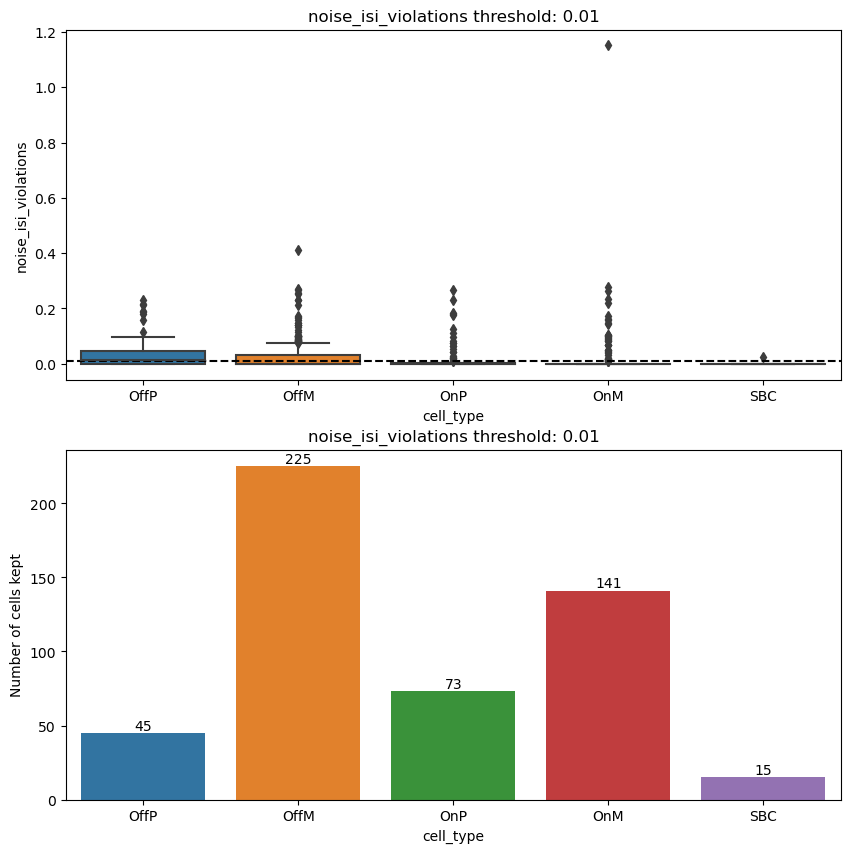

In [43]:
qc.plot_report('noise_isi_violations', 'set1');

## Threshold method 2
- `set_pct_thresh_by_type`: for a specified parameter in `df_qc`, keep the top `n_top_pct` percent of cells within each cell type.

In [47]:
qc.set_pct_thresh_by_type('set1', 'noise_spikes', n_top_pct=80)

In [48]:
qc.d_thresh['set1']['noise_spikes']

{'n_top_pct': 80,
 'b_by_type': True,
 'OffP': 4276.200000000004,
 'n_OffP': 74,
 'pct_OffP': 0.7956989247311828,
 'OffM': 11587.0,
 'n_OffM': 304,
 'pct_OffM': 0.7979002624671916,
 'OnP': 262.2000000000006,
 'n_OnP': 75,
 'pct_OnP': 0.7978723404255319,
 'OnM': 810.2,
 'n_OnM': 141,
 'pct_OnM': 0.7966101694915254,
 'SBC': 1731.0,
 'n_SBC': 12,
 'pct_SBC': 0.75}

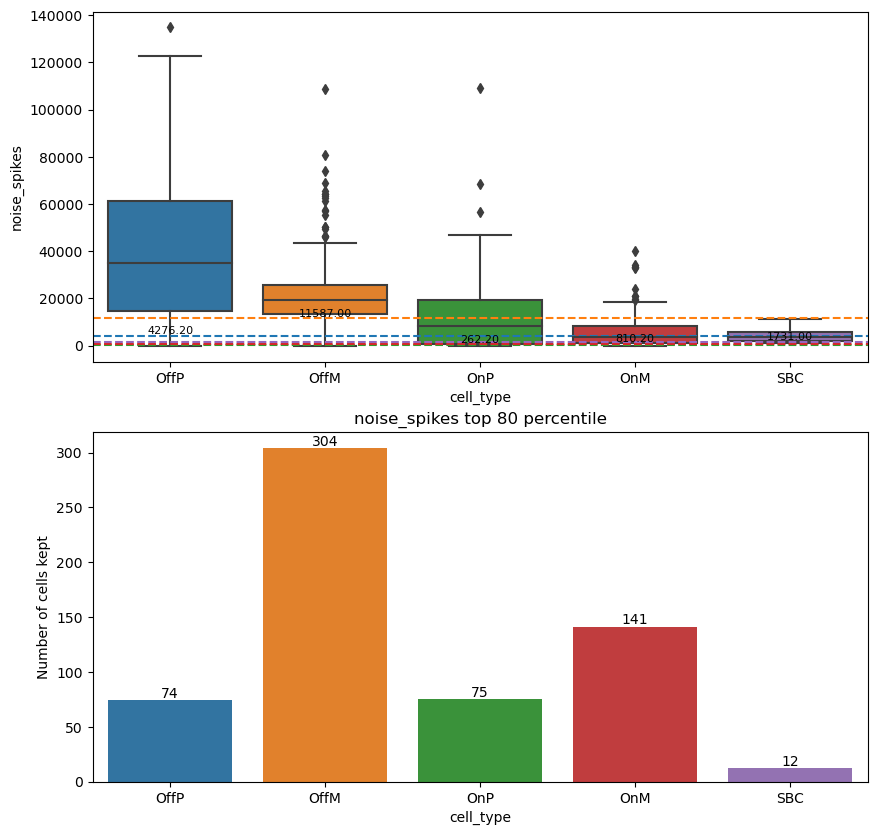

In [49]:
qc.plot_report('noise_spikes', 'set1');

## Output

We can get the cell IDs that passed the above thresholding.

In [50]:
good_cell_ids = qc.get_intersection_cells('set1')
print(f'Number of good cells: {len(good_cell_ids)}')

Number of good cells: 606


Rn I have a hackey method for updating the data object with this. Could use improvement.

In [51]:
def update_ids(good_cells, data: so.SpikeOutputs):
    data.GOOD_CELL_IDS = good_cells
    data.N_GOOD_CELLS = len(good_cells)

    # Update d_main_IDs
    for str_type in data.types.d_main_IDs.keys():
        type_ids = data.types.d_main_IDs[str_type]
        new_ids = np.intersect1d(type_ids, good_cells)
        data.types.d_main_IDs[str_type] = new_ids
        print(f'{str_type}: {len(new_ids)}/{len(type_ids)}')
    return data

data = update_ids(good_cell_ids, data)

OffP: 37/45
OffM: 167/225
OnP: 61/73
OnM: 106/141
SBC: 11/15


RACHEL: honestly, this works well so I'd say no reason not to keep as is for now.

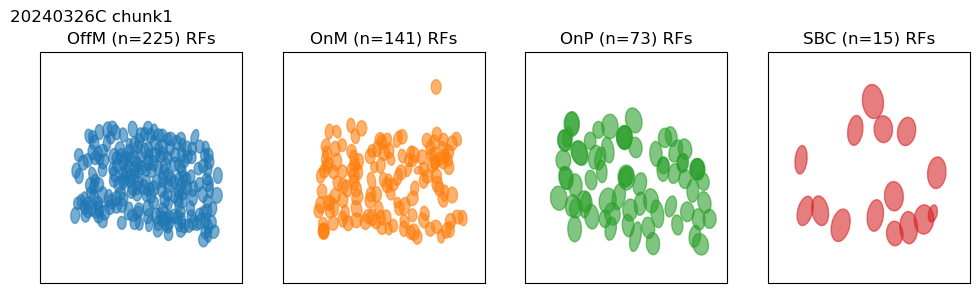

In [46]:
sp.plot_type_rfs(data, sd_mult=0.8, b_zoom=True);

In [66]:
print(data.N_GOOD_CELLS) ###I'm going to just play around a bit with the data object.

1162


Luckily enough here this gets rid of obvious duplicates.

In [3]:
psths = data.load_psth(str_protocol='SpatialNoise', ls_param_names=['numXChecks', 'numYChecks', 'numXStixels', 'numYStixels', 'stixelSize', 'stepsPerStixel'], bin_rate=100.0, isi_bin_edges=np.linspace(0,300,601))

Processing group 1 of 1 and block 1 of 2


Processing epochs in block file data001: 100%|██████████| 11/11 [00:23<00:00,  2.12s/it]


Processing group 1 of 1 and block 2 of 2


Processing epochs in block file data002: 100%|██████████| 5/5 [00:07<00:00,  1.58s/it]


Loading ISI for SpatialNoise ['data001', 'data002']...
Processing group 1 of 1 and block 1 of 2
Processing group 1 of 1 and block 2 of 2
Loaded ISI for 1162 cells.


In [4]:
# print(len(data.spikes['cluster_id']))
print(data.stim['unique_params'])
# print(len(data.stim['params']['stimTime']))
# print(len(data.spikes['spike_dict'][1][1]))
# print(data.spikes.keys())


{'numXChecks': array([152.]), 'numYChecks': array([95.]), 'numXStixels': array([52.]), 'numYStixels': array([33.]), 'stixelSize': array([90.]), 'stepsPerStixel': array([3.])}


In [128]:
print(data.types.d_main_IDs['OffP'])
spikeData_1 = data.spikes['spike_dict']

print(spikeData_1[1826])
spikeData = {}
for i in spikeData_1.keys():
    cell = str(i)
    d = {cell: spikeData_1[i]}
    spikeData.update(d)


[  27.   94.  165.  191.  239.  332.  382.  401.  439.  443.  471.  499.
  540.  542.  576.  589.  617.  676.  718.  728.  737.  766.  798.  830.
  938.  964. 1045. 1161. 1202. 1206. 1211. 1307. 1334. 1462. 1579. 1664.
 1741.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [131]:
print(len(spikeData['1']))

16


In [132]:
np.savez('/Users/racheloaks-leaf/Desktop/lab/20240326C/spikeData.npz', **spikeData)
np.savez('/Users/racheloaks-leaf/Desktop/lab/20240326C/spikeInfo.npz', **data.spikes)
np.savez('/Users/racheloaks-leaf/Desktop/lab/20240326C/stimData.npz', **data.stim)
np.savez('/Users/racheloaks-leaf/Desktop/lab/20240326C/cellTypes.npz', **data.types.d_main_IDs)
